# Lab 1 Report and Demonstration of Backpropagation

## Student Information
- **Name:** Abdelillah Serghine  
- **Email:** a.serghine@esi-sba.dz  
- **Group:** 02 IASD  

---

## Computing the Gradient $\frac{\partial J}{\partial w_1}$ using Backpropagation

### Forward Pass Equations
From the course, we have the following equations:
$$
    z_1 = w_1 x_1,  
    \quad a_1 = \sigma(z_1),  
    \quad z_2 = w_2 a_1,  
    \quad \hat{y} = \sigma(z_2),  
    \quad J = \frac{1}{n} \sum_{i=1}^{n} L(\hat{y}, y),  
$$
where $\sigma(z)$ is the activation function (assumed to be the sigmoid function in this case).

---

## Applying the Chain Rule
Using the chain rule, we expand the derivative $\frac{\partial J}{\partial w_1}$ as follows:

$$ 
    \frac{\partial J}{\partial w_1} = \frac{\partial J}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z_2} \cdot \frac{\partial z_2}{\partial a_1} \cdot \frac{\partial a_1}{\partial z_1} \cdot \frac{\partial z_1}{\partial w_1}.  
$$

Now, we compute each term individually.

---

## Computing Individual Gradients

### Gradient of Loss with respect to $\hat{y}$
Assuming we use mean squared error (MSE) as the loss function:

$$
    J = \frac{1}{2} (\hat{y} - y)^2.
$$

Taking the derivative with respect to $\hat{y}$:

$$
    \frac{\partial J}{\partial \hat{y}} = (\hat{y} - y).
$$

---

### Gradient of $\hat{y}$ with respect to $z_2$
Since $\hat{y} = \sigma(z_2)$ and the derivative of the sigmoid function is:

$$
    \frac{d\sigma}{dz} = \sigma(z)(1 - \sigma(z)),
$$

we get:

$$
    \frac{\partial \hat{y}}{\partial z_2} = \hat{y} (1 - \hat{y}).
$$

---

### Gradient of $z_2$ with respect to $a_1$
Since $z_2 = w_2 a_1$,

$$
    \frac{\partial z_2}{\partial a_1} = w_2.
$$

---

### Gradient of $a_1$ with respect to $z_1$
Since $a_1 = \sigma(z_1)$, its derivative is:

$$
    \frac{\partial a_1}{\partial z_1} = a_1 (1 - a_1).
$$

---

### Gradient of $z_1$ with respect to $w_1$
Since $z_1 = w_1 x_1$,
$$
    \frac{\partial z_1}{\partial w_1} = x_1.
$$

---

## Final Expression for $\frac{\partial J}{\partial w_1}$
Substituting all the computed gradients into our chain rule equation, we obtain:

$$
    \frac{\partial J}{\partial w_1} = (\hat{y} - y) \cdot \hat{y} (1 - \hat{y}) \cdot w_2 \cdot a_1 (1 - a_1) \cdot x_1.
$$

This expression gives the gradient of the loss function with respect to $w_1$, which is required for updating the weight in gradient descent.

---

### Conclusion
This step-by-step derivation shows how backpropagation computes the gradient $\frac{\partial J}{\partial w_1}$, which is used in training neural networks. 

## TP1 


In [20]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#### 1- the function init params

In [ ]:

def init_params(nx, nh, ny):
    params = {
        "W1": np.random.normal(0, 0.3, (nh, nx)),
        "b1": np.zeros((nh, 1)),
        "W2": np.random.normal(0, 0.3, (ny, nh)),
        "b2": np.zeros((ny, 1))
    }
    return params

In [22]:
def tanh(x):
    return np.tanh(x)


In [23]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

#### 2-  the function forward(params, X)

In [ ]:
 
def forward(params, X):
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]
    Z1 = W1 @ X + b1
    A1 = tanh(Z1)
    Z2 = W2 @ A1 + b2
    A2 = softmax(Z2)
    return A2, {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

#### 3-  the function loss_accuracy(Yhat, Y)

In [ ]:

def loss_accuracy(Yhat, Y):
    m = Y.shape[1]
    loss = -np.sum(Y * np.log(Yhat + 1e-8)) / m
    accuracy = np.mean(np.argmax(Yhat, axis=0) == np.argmax(Y, axis=0))
    return loss, accuracy

#### 4-  the function backward(x,params, outputs, Y)

In [ ]:

def backward(X, Y, params, outputs):
    m = X.shape[1]
    A1, A2 = outputs["A1"], outputs["A2"]
    W2 = params["W2"]
    
    dZ2 = A2 - Y
    dW2 = (dZ2 @ A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    dA1 = W2.T @ dZ2
    dZ1 = dA1 * (1 - np.power(A1, 2))
    dW1 = (dZ1 @ X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

#### 5- the function sgd(params, grads, eta)

In [ ]:

def sgd(params, grads, eta):
    for key in params:
        params[key] -= eta * grads["d" + key]

#### 6-7-  the training steps  and training the MLP 


Epoch 1/10, Loss: 0.2815, Accuracy: 0.9181
Epoch 2/10, Loss: 0.2219, Accuracy: 0.9358
Epoch 3/10, Loss: 0.1966, Accuracy: 0.9425
Epoch 4/10, Loss: 0.1762, Accuracy: 0.9471
Epoch 5/10, Loss: 0.1655, Accuracy: 0.9513
Epoch 6/10, Loss: 0.1541, Accuracy: 0.9543
Epoch 7/10, Loss: 0.1472, Accuracy: 0.9549
Epoch 8/10, Loss: 0.1433, Accuracy: 0.9559
Epoch 9/10, Loss: 0.1349, Accuracy: 0.9579
Epoch 10/10, Loss: 0.1323, Accuracy: 0.9600


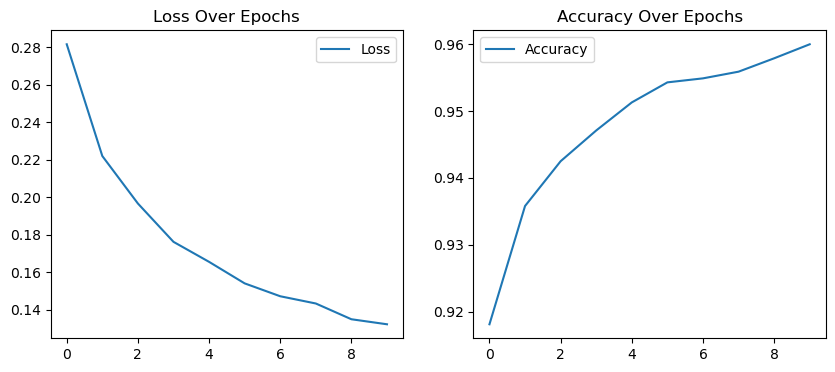

In [ ]:
def train_mlp(nx, nh, ny, eta, batch_size, epochs):
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    X_train, X_test = X_train.reshape(-1, nx).T / 255.0, X_test.reshape(-1, nx).T / 255.0
    Y_train, Y_test = to_categorical(Y_train).T, to_categorical(Y_test).T
    
    params = init_params(nx, nh, ny)
    losses, accuracies = [], []
    
    for epoch in range(epochs):
        indices = np.random.permutation(X_train.shape[1])
        X_train, Y_train = X_train[:, indices], Y_train[:, indices]
        
        for i in range(0, X_train.shape[1], batch_size):
            X_batch, Y_batch = X_train[:, i:i+batch_size], Y_train[:, i:i+batch_size]
            Yhat, outputs = forward(params, X_batch)
            loss, acc = loss_accuracy(Yhat, Y_batch)
            grads = backward(X_batch, Y_batch, params, outputs)
            sgd(params, grads, eta)
        
        Yhat_test, _ = forward(params, X_test)
        loss, acc = loss_accuracy(Yhat_test, Y_test)
        losses.append(loss)
        accuracies.append(acc)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label='Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()
    
    plt.show()
    return params

# Train the network
params = train_mlp(nx=784, nh=128, ny=10, eta=0.1, batch_size=50, epochs=10)
